In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import os

# Set the path to the dataset
dataset_path = "Dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "Training")  # Corrected path
test_dir = os.path.join(dataset_path, "Testing")    # Corrected path

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

# Print to verify the paths are correct
print(f"Training directory: {train_dir}")
print(f"Testing directory: {test_dir}")


Training directory: Dataset\Training
Testing directory: Dataset\Testing


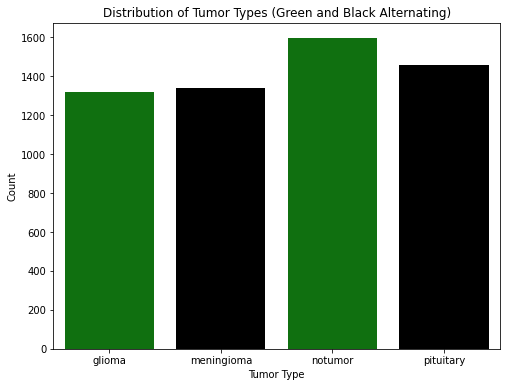

In [10]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)  # Use os.path.join to handle path separators
    if os.path.exists(folder_path):  # Check if the folder exists
        images = os.listdir(folder_path)
        count = len(images)
        train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))
    else:
        print(f"Folder for category '{category}' not found: {folder_path}")

train_df = pd.concat(train_data, ignore_index=True)

# Define a custom palette with alternating green and black
custom_palette = ["green", "black", "green", "black"]  # Green for the first and third, black for the second and fourth

# Visualize the distribution of tumor types in the training dataset with the custom palette
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count", palette=custom_palette)
plt.title("Distribution of Tumor Types (Green and Black Alternating)")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

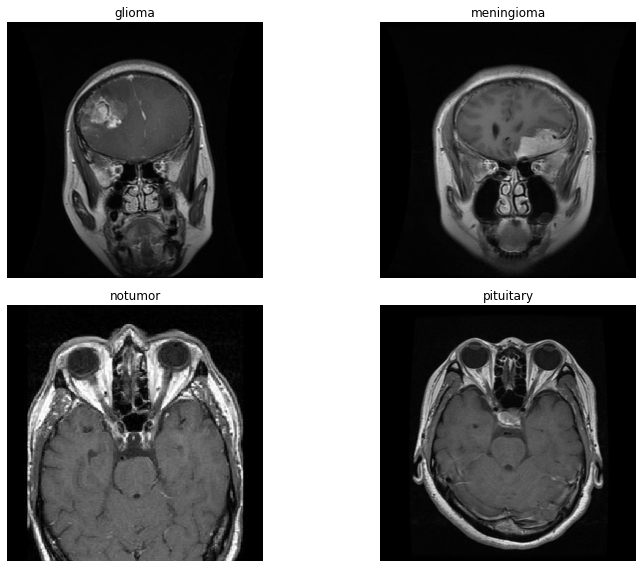

In [11]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 10

In [13]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

c:\Users\Vinisky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50


c:\Users\Vinisky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 125s 677ms/step - accuracy: 0.4241 - loss: 1.1835 - val_accuracy: 0.5437 - val_loss: 1.2287
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 1:02 351ms/step - accuracy: 0.6250 - loss: 0.8725

c:\Users\Vinisky\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.8725 - val_accuracy: 0.5806 - val_loss: 1.4348
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 77s 416ms/step - accuracy: 0.6675 - loss: 0.8004 - val_accuracy: 0.6398 - val_loss: 0.9163
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8125 - loss: 0.5512 - val_accuracy: 0.8710 - val_loss: 0.5722
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 73s 399ms/step - accuracy: 0.7212 - loss: 0.6794 - val_accuracy: 0.5109 - val_loss: 1.8204
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5938 - loss: 0.9156 - val_accuracy: 0.7419 - val_loss: 0.8643
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 81s 445ms/step - accuracy: 0.7681 - loss: 0.5949 - val_accuracy: 0.7023 - val_loss: 0.8520
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8750 - loss: 0.3450 - val_accuracy: 0.8710 - val_loss: 0.4963
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 73s 400ms/step - accuracy: 0.7803 - loss: 0.5598 - val_accur

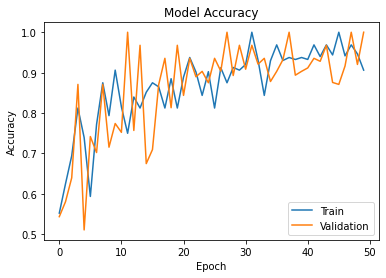

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

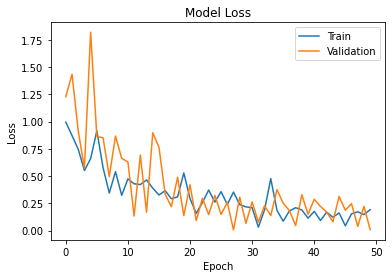

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8798 - loss: 0.3160
Test Loss: 0.21190786361694336
Test Accuracy: 0.9234374761581421


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step


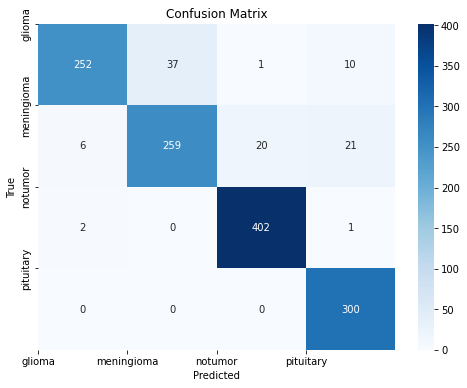

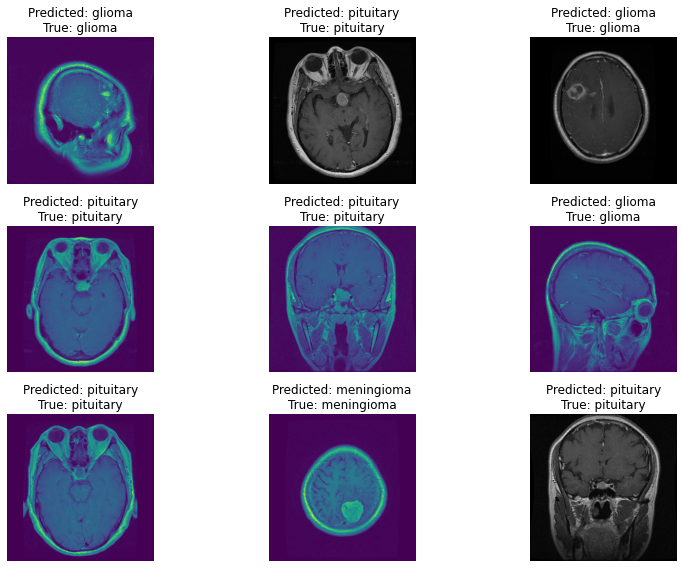

In [20]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.9692307692307692
Recall: 0.84
F1-Score: 0.9

Class: meningioma
Precision: 0.875
Recall: 0.8464052287581699
F1-Score: 0.8604651162790697

Class: notumor
Precision: 0.950354609929078
Recall: 0.9925925925925926
F1-Score: 0.9710144927536232

Class: pituitary
Precision: 0.9036144578313253
Recall: 1.0
F1-Score: 0.9493670886075949



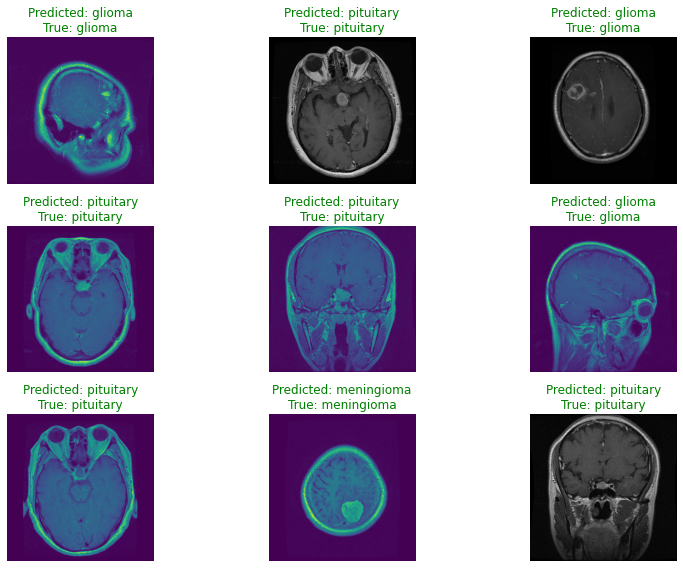

In [21]:
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
# Save the trained model
model.save("brain_tumor_detection_model.h5")